![image info](https://ineuron.ai/images/ineuron-logo.png)

# Credit Card Usage Clustering
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.
* This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [12]:
df = pd.read_csv("./data/CC GENERAL.csv")

**Show Top 5 Records**

In [14]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Shape of the dataset**

In [16]:
df.shape

(8950, 18)

**Summary of the dataset**

In [19]:
# Display summary statistics for a dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [25]:
df['BALANCE_FREQUENCY'].skew

<bound method Series.skew of 0       0.818182
1       0.909091
2       1.000000
3       0.636364
4       1.000000
          ...   
8945    1.000000
8946    1.000000
8947    0.833333
8948    0.833333
8949    0.666667
Name: BALANCE_FREQUENCY, Length: 8950, dtype: float64>

**Check Datatypes in the dataset**

In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## 3. EXPLORING DATA

* **CUSTID** : Identification of Credit Card holder (Categorical)
* **BALANCE** : Balance amount left in their account to make purchases (
* **BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES** : Amount of purchases made from account
* **ONEOFFPURCHASES** : Maximum purchase amount done in one-go
* **INSTALLMENTSPURCHASES** : Amount of purchase done in installment
* **CASHADVANCE** : Cash in advance given by the user
* **PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
* **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
* **PURCHASESTRX** : Numbe of purchase transactions made
* **CREDITLIMIT** : Limit of Credit Card for user
* **PAYMENTS** : Amount of Payment done by user
* **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
* **PRCFULLPAYMENT** : Percent of full payment paid by user
* **TENURE** : Tenure of credit card service for user

In [3]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

NameError: name 'df' is not defined

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

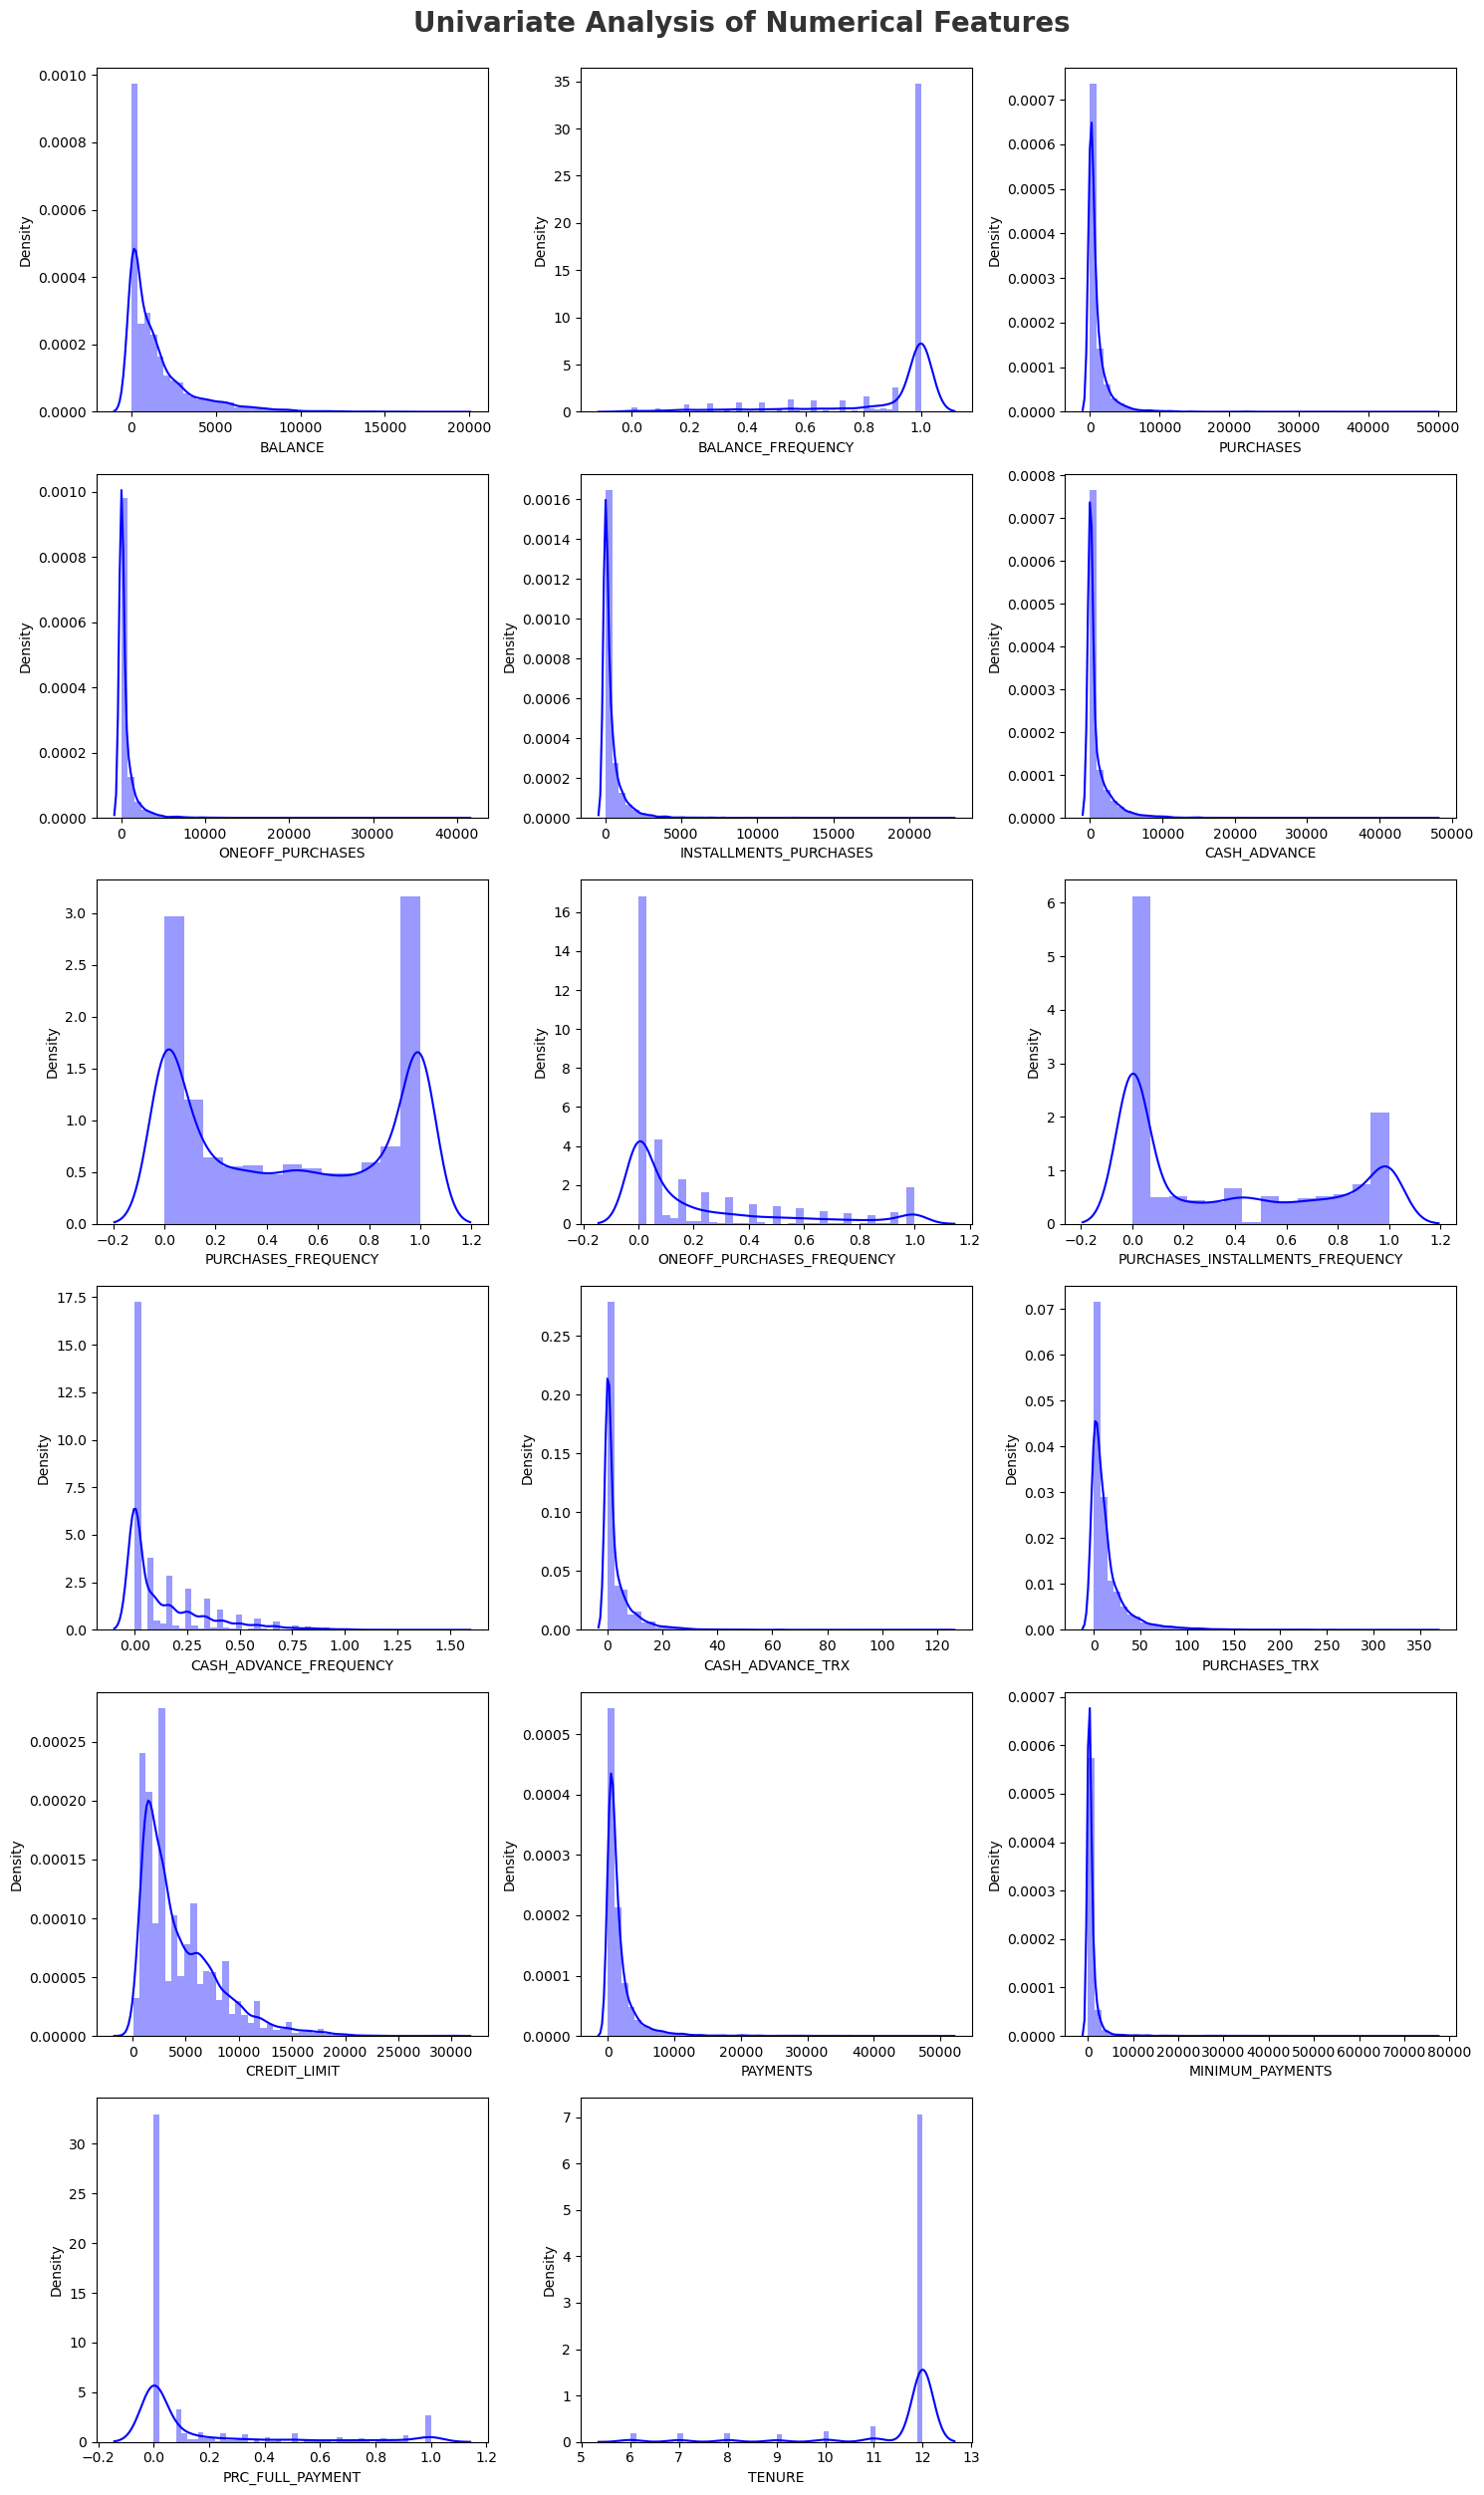

In [8]:
plt.rcParams['figure.figsize'] = (15,25)
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    ax= plt.subplot(6, 3, i+1)
    sns.distplot(x=df[numeric_features[i]], color='blue', ax=ax)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
plt.savefig('./images/Univariate_Num.png')

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [9]:
df[(list(df.columns)[1:])].corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


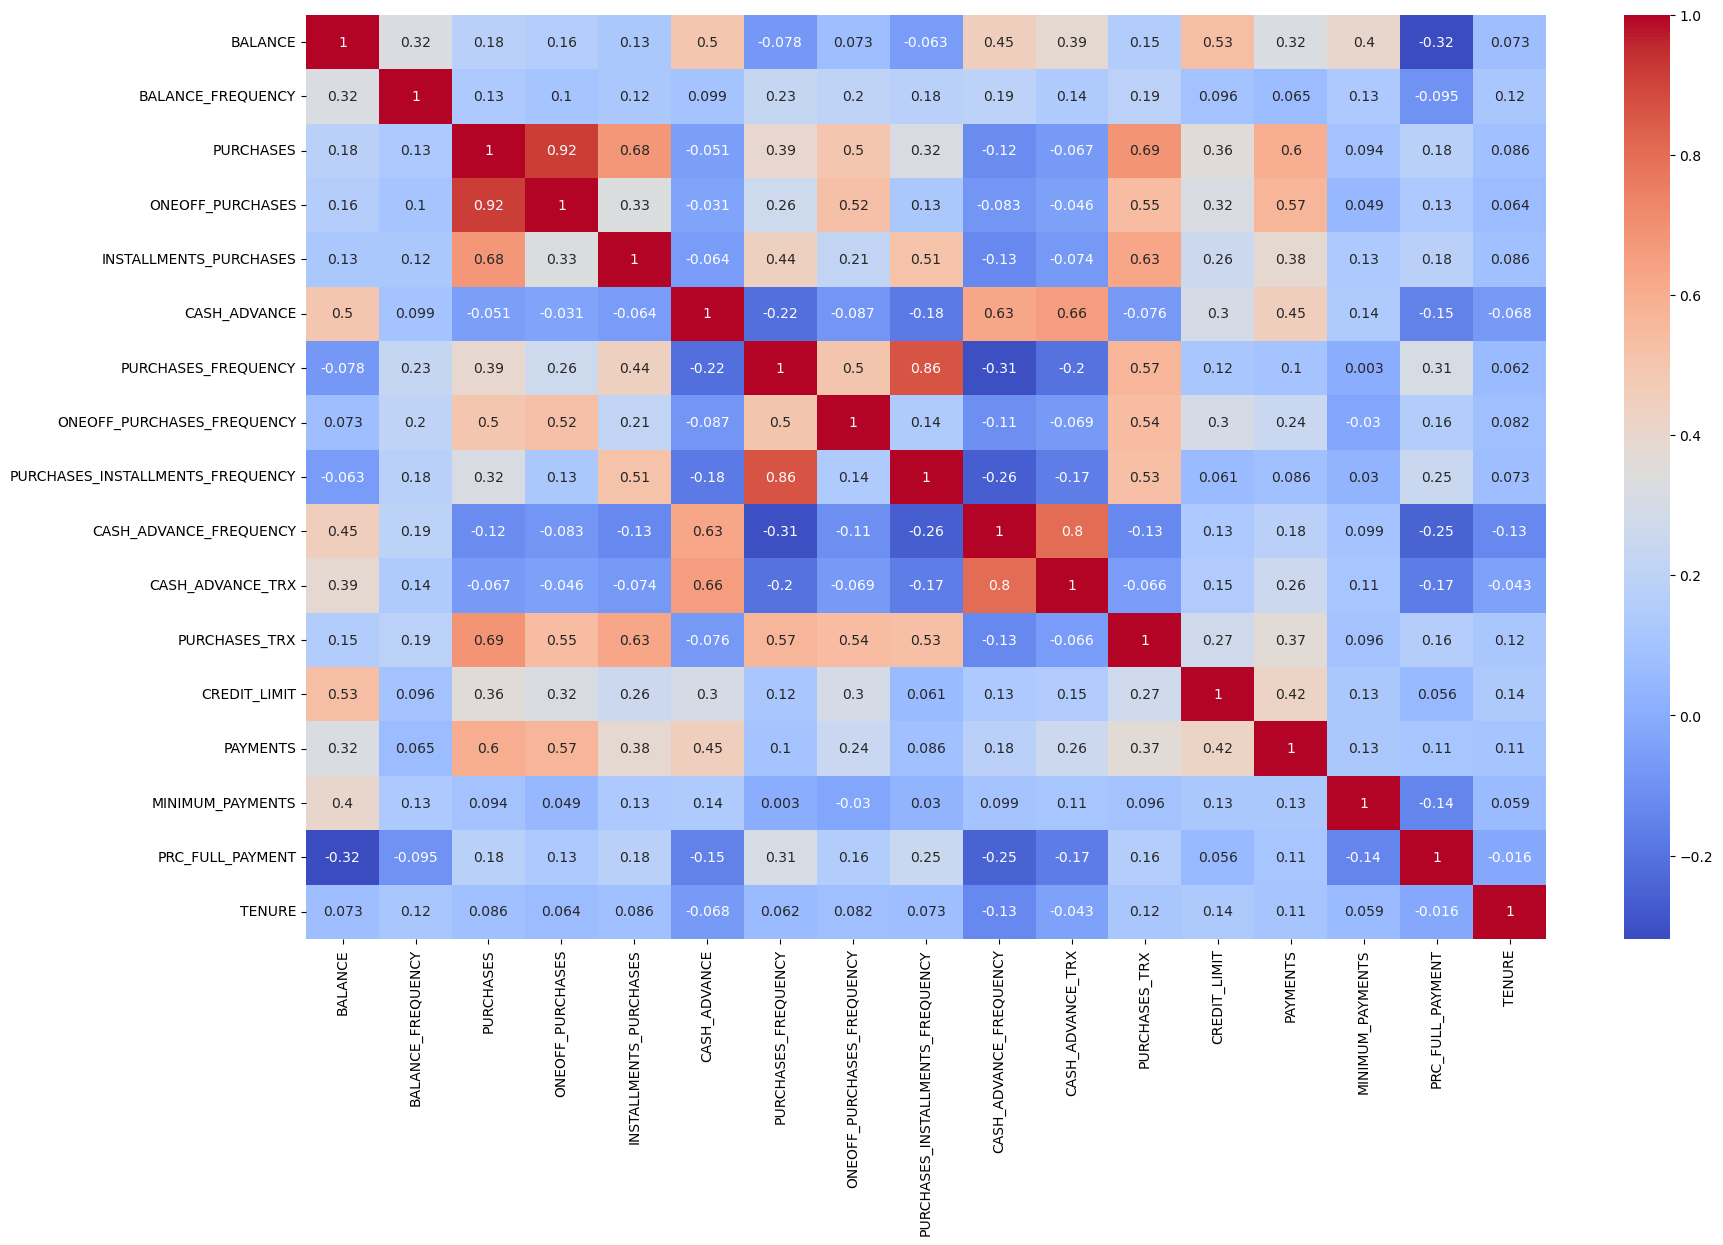

In [11]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.show()

**Report** 
* Purchases and one_off purchases are highly corrrelated.
* Other features dont have much collinearity.

### Checking Null Values

In [12]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

* Minimum payment column has 313 missing values.
* Credit limit has 1 missing values
* Missing values can be handled in feature engineering.

In [13]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=20]
print('Continues features :',continues_features, '\n Number of Continues features:', len(continues_features))

Continues features : ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'] 
 Number of Continues features: 16


In [14]:
for i in numeric_features:
    if i not in continues_features:
        print(i)

TENURE


In [22]:
df["TENURE"].value_counts()

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: count, dtype: int64

## Initial Analysis Report

* **There are missing values in the 2 columns.**
* **Many of the skewed columns can be transformed.**
* **In the Categorical column, which is CustomerID we can remove it in datacleaning as it wont be required for model**

## 4. Visualization

### 4.1 Balance Distribution

In [23]:
sns.set(style="whitegrid")

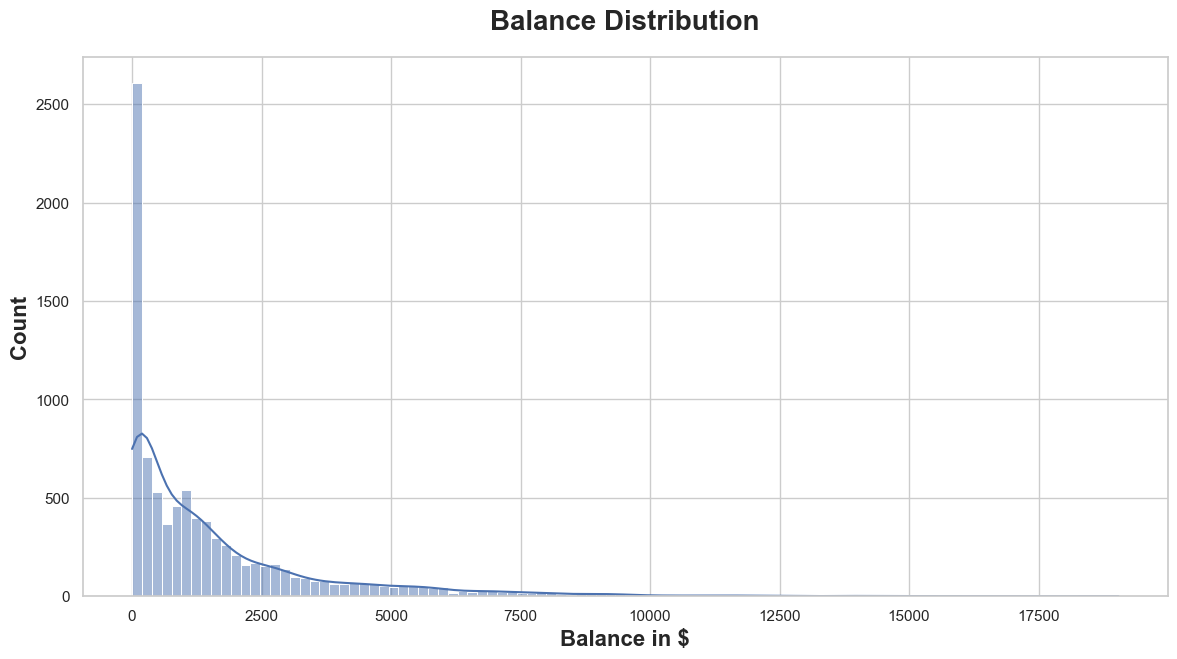

In [24]:
plt.subplots(figsize=(14,7))
sns.histplot(df['BALANCE'], kde = True, color='b', bins=100)
plt.title("Balance Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.xlabel("Balance in $", weight="bold", fontsize=16)
plt.show()

* Let's visualize some variables in the dataset starting with balance. The distribution of balance (total amount of money that you owe to your credit card company) range from 0 to 20,000 dollars. The interesting thing is that there seems to be a very high number of credit card with 0 balance. This could be due because people are holding what is called "zero balance cards". 
* Most people keep zero balance to maintain credit score.

### 4.2 Balance Frequency

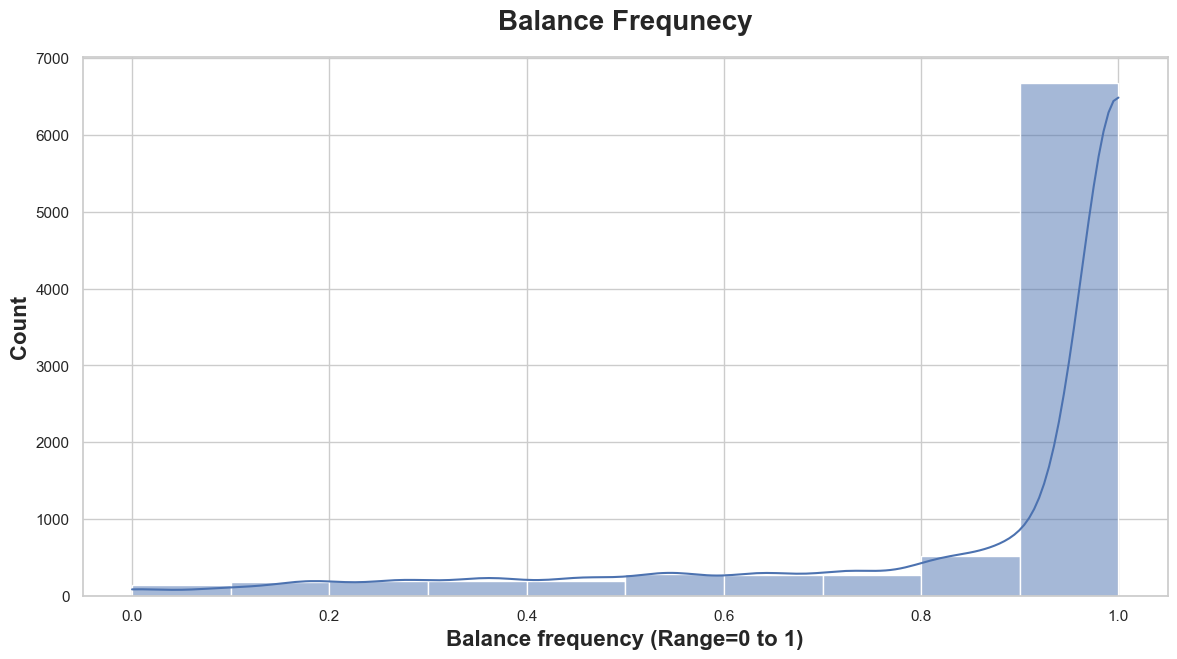

In [25]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df['BALANCE_FREQUENCY'], bins=10, kde=True, color='b')
plt.title("Balance Frequnecy", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.xlabel("Balance frequency (Range=0 to 1)", weight="bold", fontsize=16)
plt.show()

**Report:**
* As per balance frequency 1 means the balance is updated frequently and 0 is not frequently updated.
* As per chart many people get their balance frequently updated.

### 4.3 Purchase Count

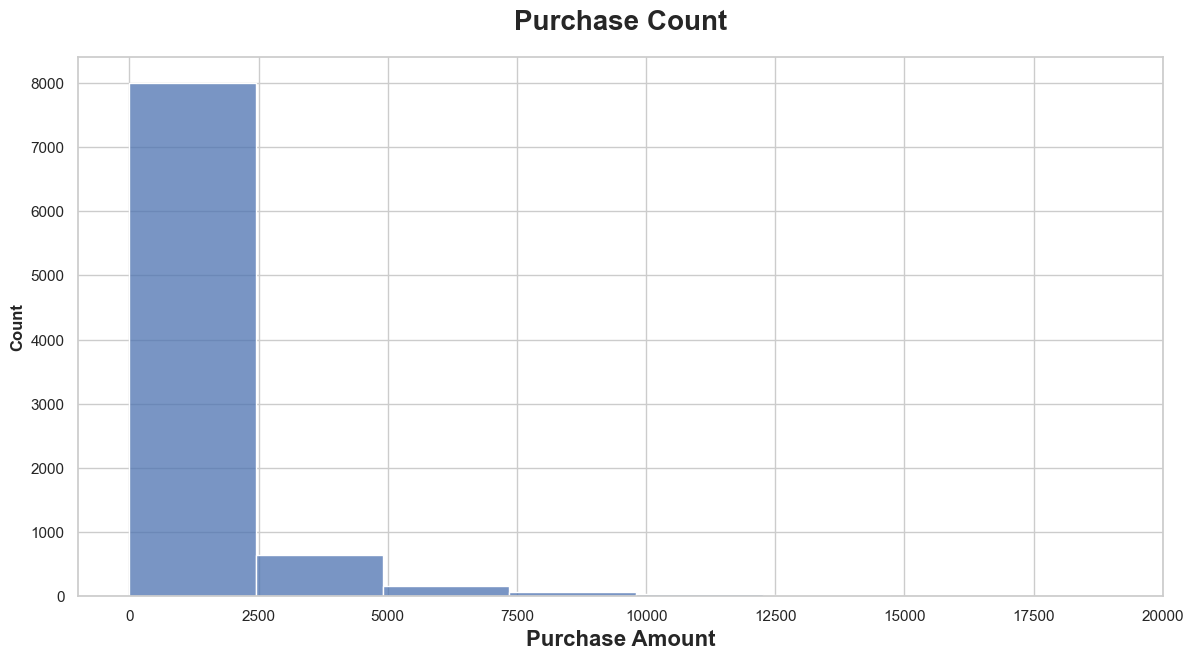

In [26]:
plt.subplots(figsize=(14,7))
sns.histplot(df['PURCHASES'],bins=20)
plt.title("Purchase Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Purchase Amount", weight="bold", fontsize=16)
plt.xlim(-1000,20000) # For clear visualization 
plt.show()

**Report** 
* From the chart its clear that many people dont purchase.
* Most purchase spend anywhere from 0 dollars to 2500 dollars

### 4.4 Type of Purchases

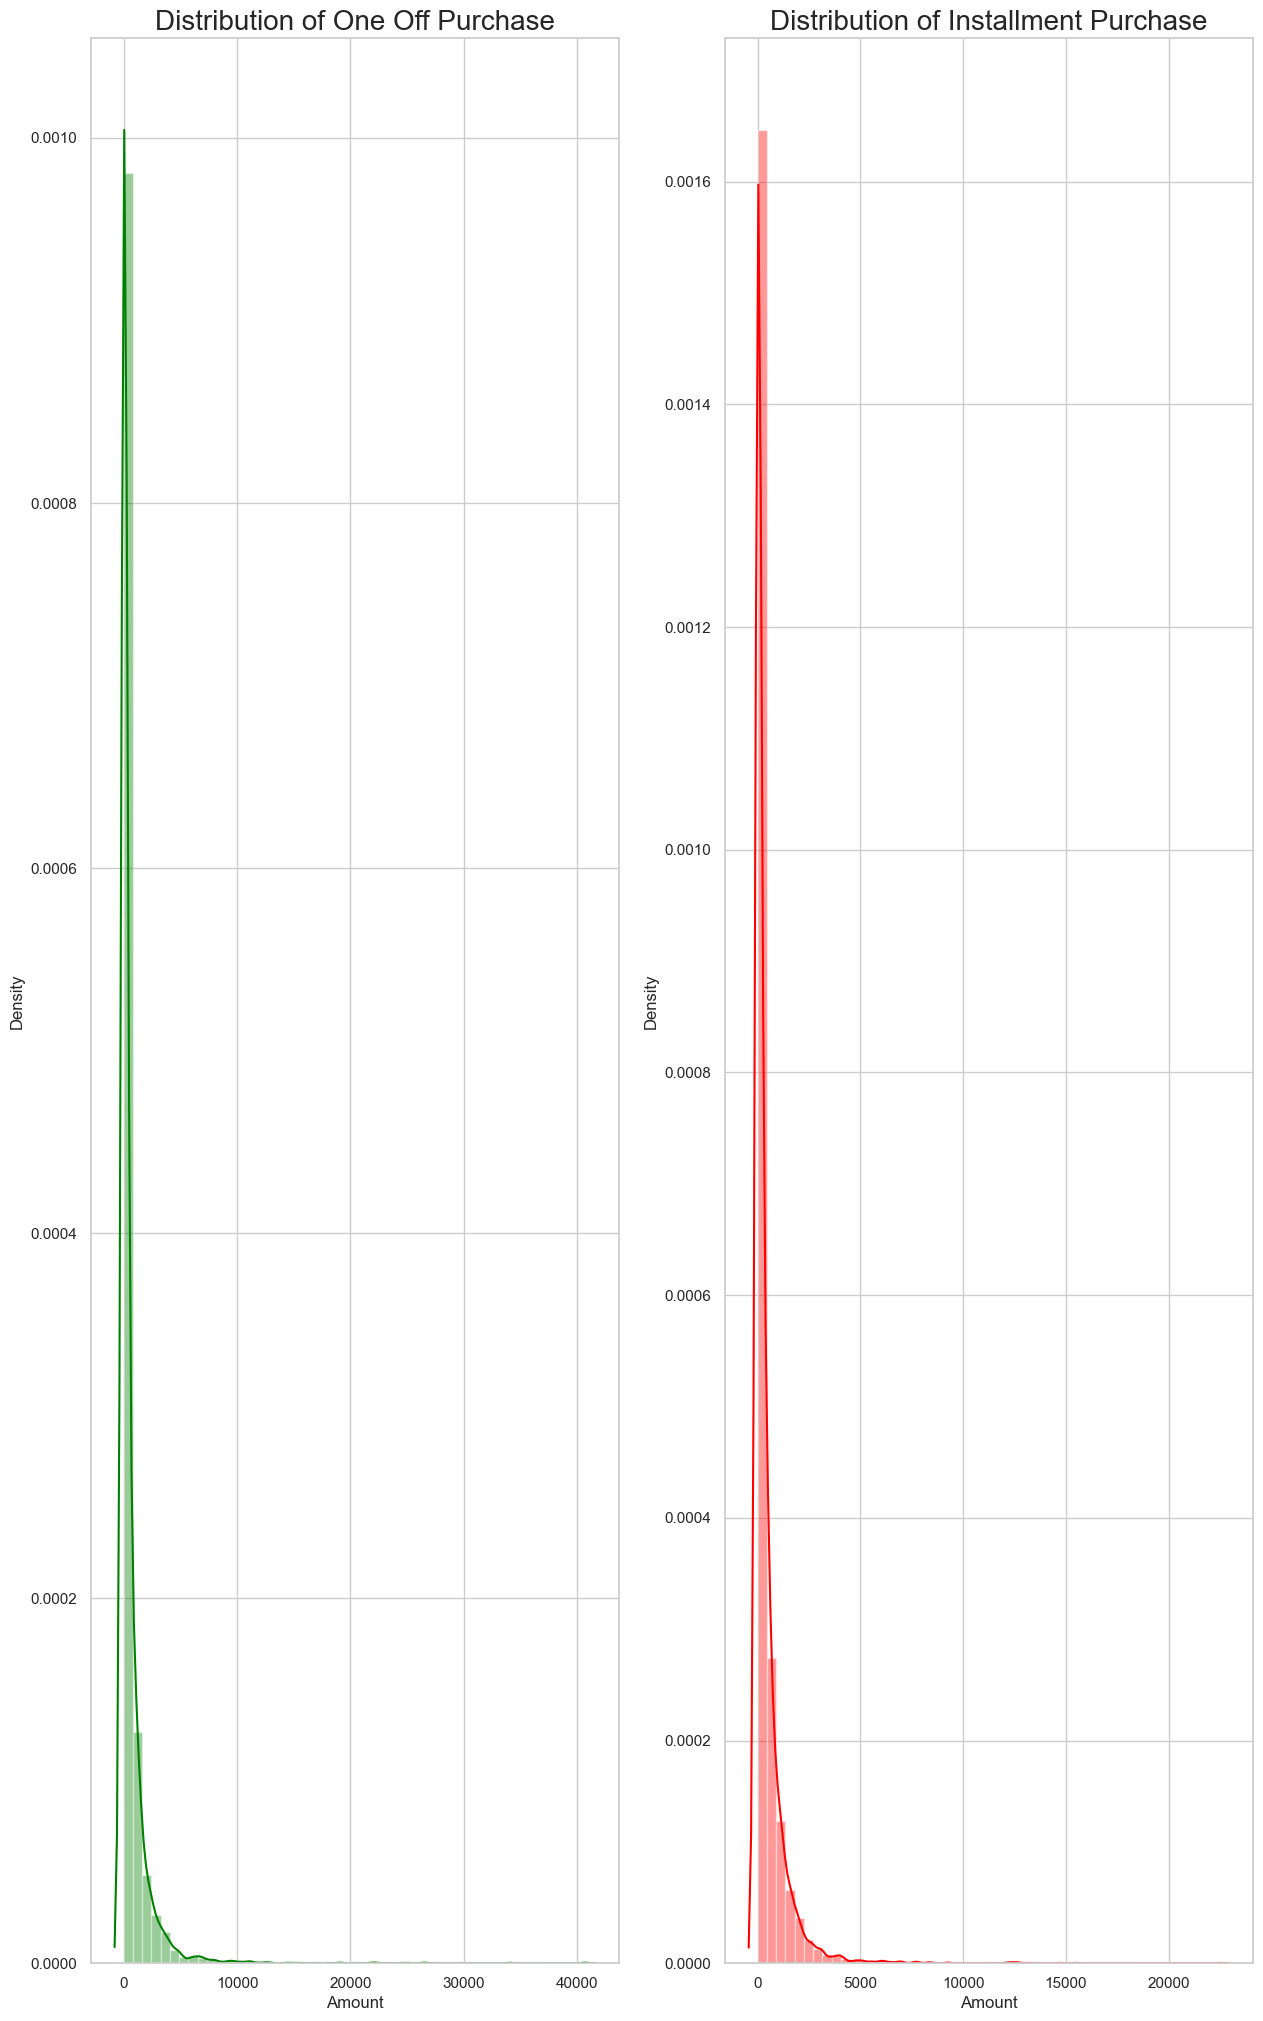

In [27]:
plt.subplot(1,2,1)
sns.distplot(df['ONEOFF_PURCHASES'],color='green')
plt.title('Distribution of One Off Purchase', fontsize = 20)
plt.xlabel('Amount')


plt.subplot(1,2,2)
sns.distplot(df['INSTALLMENTS_PURCHASES'], color='red')
plt.title('Distribution of Installment Purchase', fontsize = 20)
plt.xlabel('Amount')
plt.show()

**Report:**
*
* 
*

### 4.5 Credit Limit

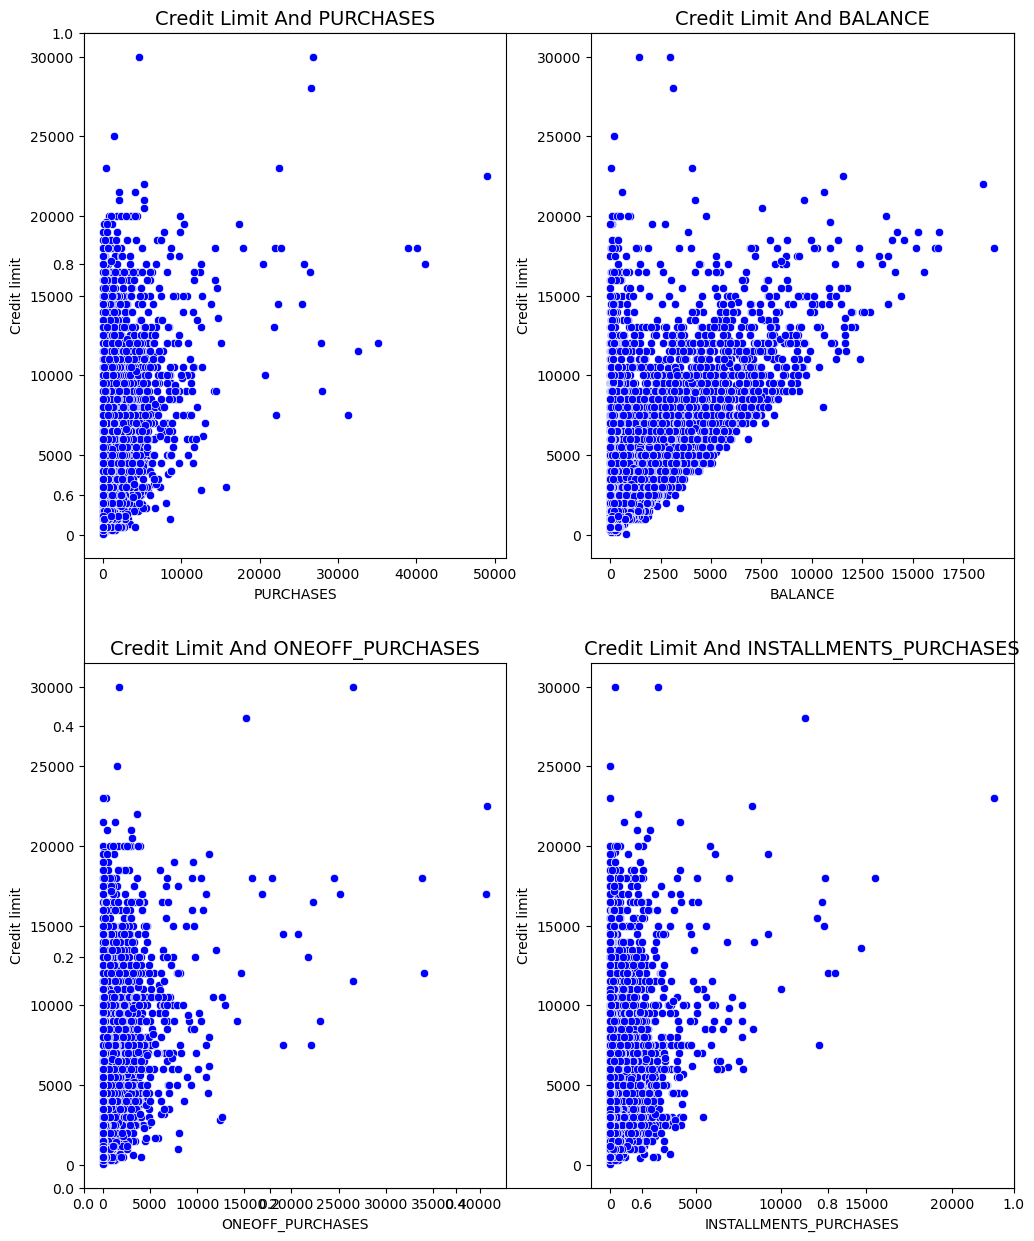

In [30]:
plt.subplots(figsize=(12,15))
cols= ['PURCHASES','BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x = df[cols[i]],y = df['CREDIT_LIMIT'],  color='b')
    plt.title(f'Credit Limit And {cols[i]}', fontsize =14)
    plt.xlabel(cols[i])
    plt.ylabel('Credit limit')

**Report**
* `PURCHASES` and `BALANCE` has positive correaltion with credit limit.
* Credit limit increases as balance increases, as people owes more to bank their credit scores increases which in turn increases their credit limit.
* As Purchases increases Credit limit also increases.

### 4.6 Frequency

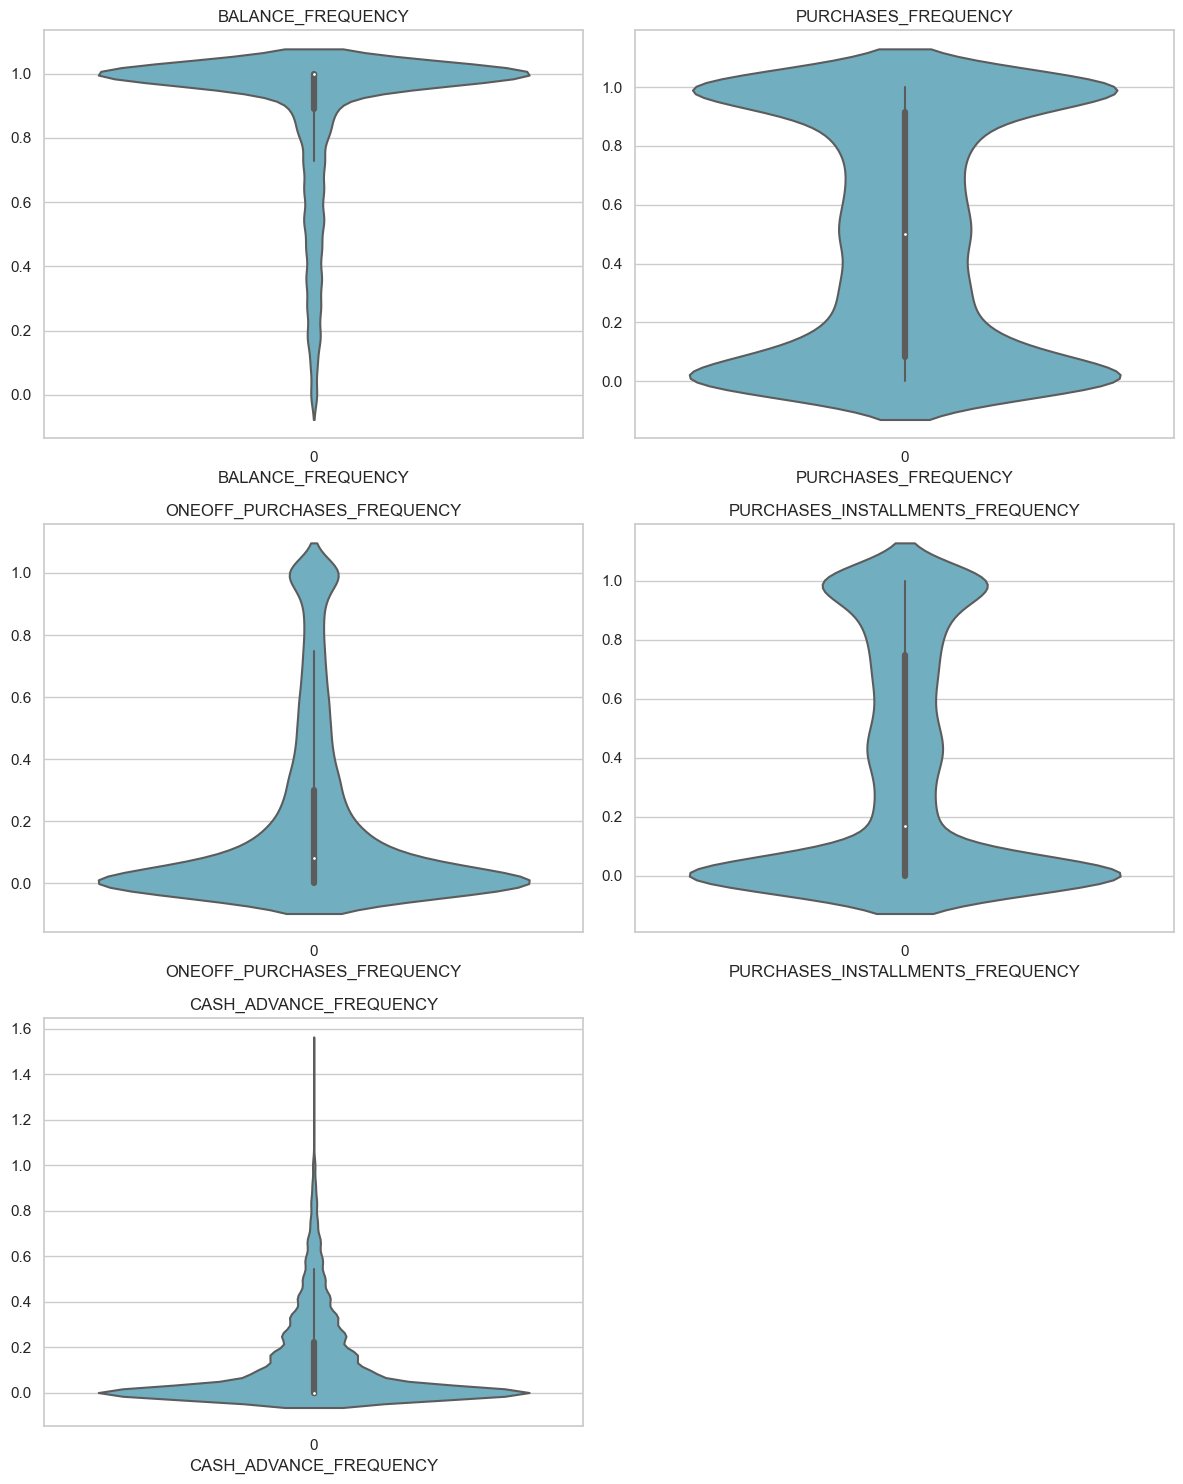

In [32]:
cols=['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
      'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY']
plt.subplots(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.violinplot(df[cols[i]], color='c')
    plt.title(cols[i], fontsize =12)
    plt.xlabel(cols[i])
    plt.tight_layout()

### 4.8 Transactions

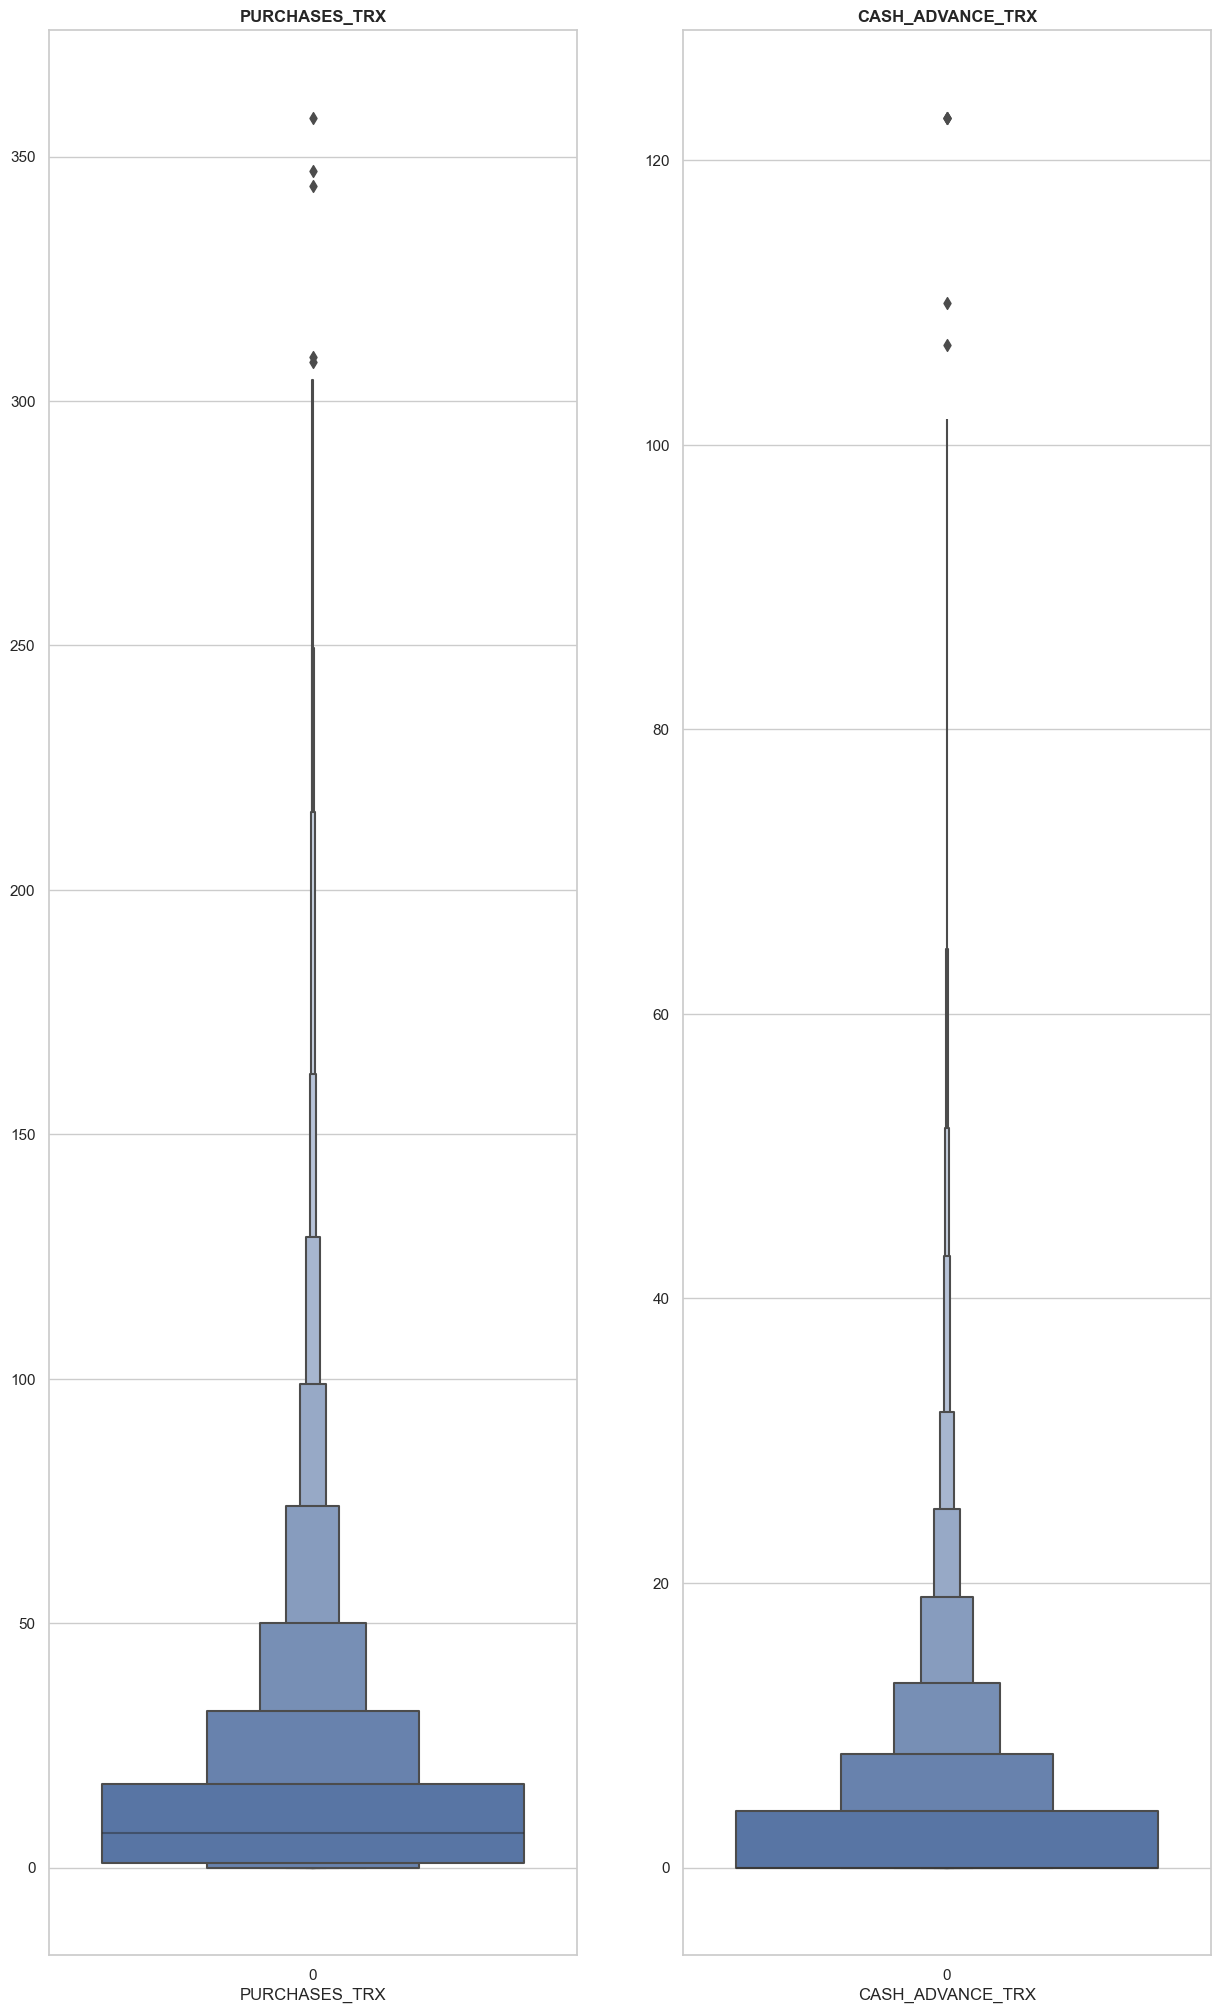

In [35]:
cols= ['PURCHASES_TRX','CASH_ADVANCE_TRX']
for i in range(len(cols)):
    plt.subplot(1,2,i+1)
    sns.boxenplot(df[cols[i]])
    plt.title(cols[i], weight='bold')
    plt.xlabel(cols[i])

* **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced".
* **PURCHASESTRX** : Number of purchase transactions made.

**Report**
* People make very less purchase transaction and look like people use it for credit score.
* Cash paid in advance is lesser than puchase transaction, as people will build up the balance and pay them in single transcation.

### 4.8 Tenure

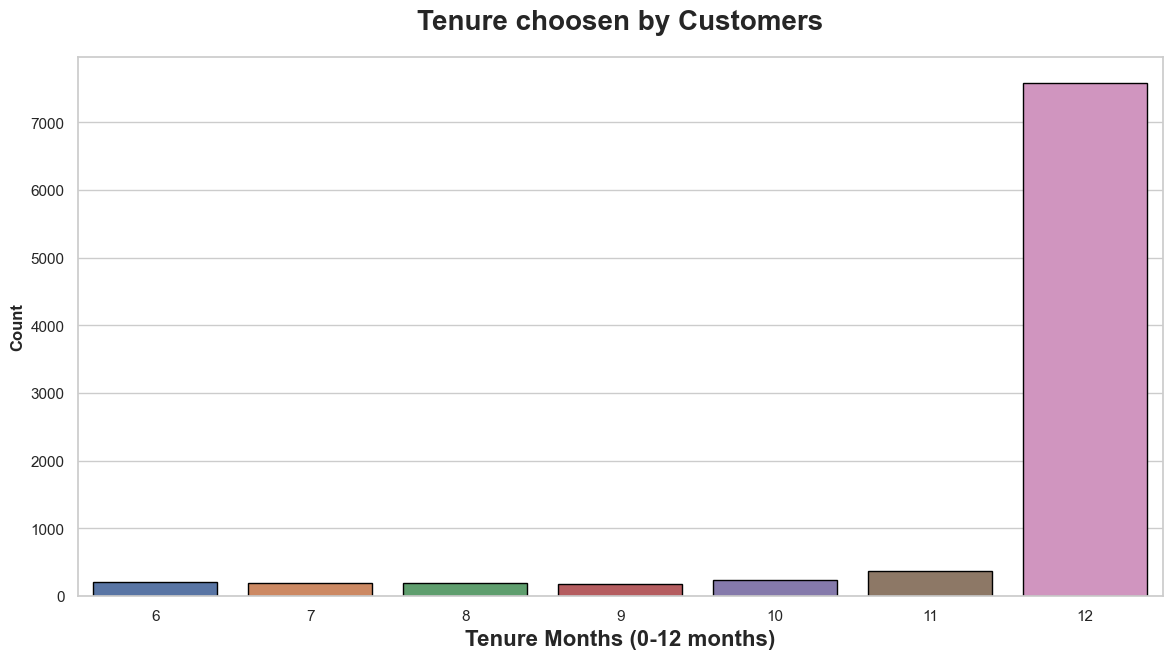

In [36]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.TENURE,ec = "black")
plt.title("Tenure choosen by Customers", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Tenure Months (0-12 months)", weight="bold", fontsize=16)
plt.show()

In [37]:
df["TENURE"].value_counts()

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: count, dtype: int64

**Report**
* Tenure is the repayment period of the cards, ranging from 6-12 months. Most of the cards are 12 months cards.
* Which means people take service for 12 months

### 4.10 Payments

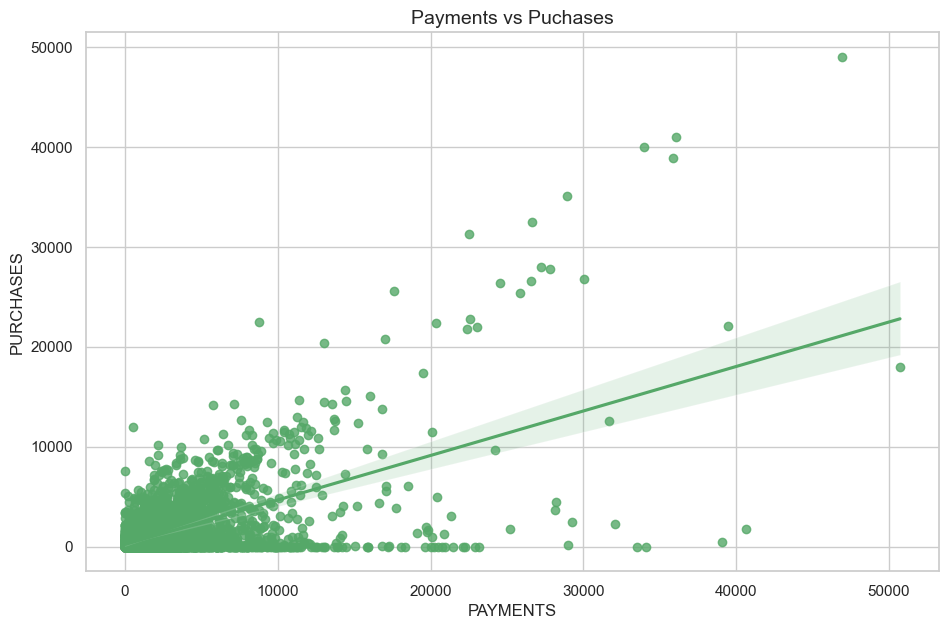

In [38]:
plt.subplots(figsize=(11,7))
sns.set_style('darkgrid')
sns.regplot(x=df['PAYMENTS'],y=df['PURCHASES'], color='g')
plt.title('Payments vs Puchases', fontsize =14)
plt.show()

**Report**
* There is positive corellation between Payments and Purchases.

### 4.11 Percentage of full payment 

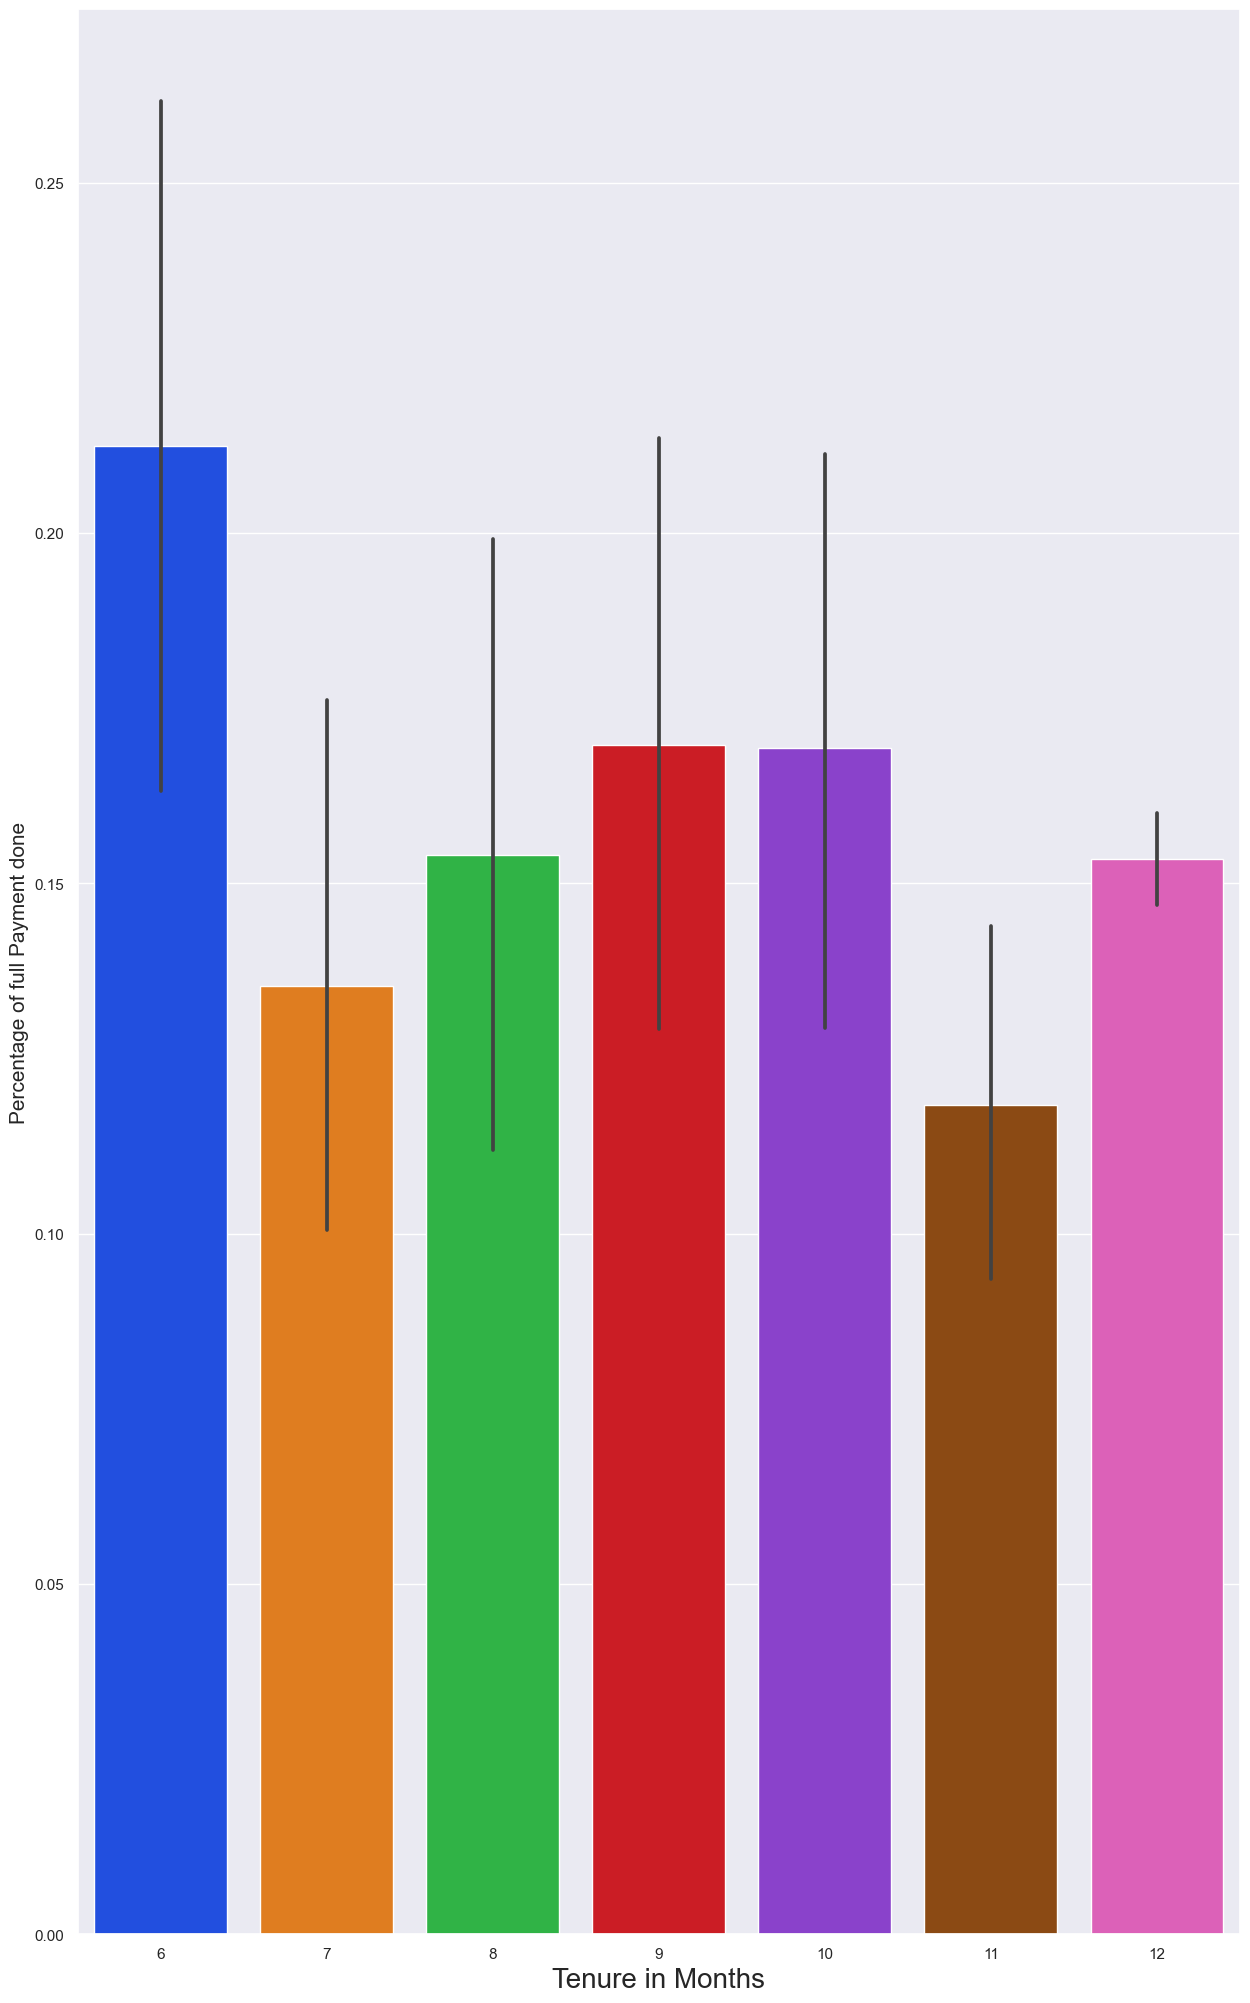

In [39]:
sns.barplot(y=df.PRC_FULL_PAYMENT,x=df.TENURE,palette='bright')
plt.ylabel("Percentage of full Payment done",size=15)
plt.xlabel("Tenure in Months", size=20)
plt.show()

**Report**
* As per above chart people who opted for 6 months EMI tenure has repaid more.
* As the months increase people repay less amount.

In [49]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################

# Create a full report of all the EDA we have done till now. 